In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import re
import numpy as np
import seaborn as sns
import warnings
import folium

import pandas as pd
import folium
from folium import plugins 
from geopy.geocoders import Nominatim
import time

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

#from statsmodels.tsa.seasonal import seasonal_decompose

In [74]:
path = '../data/Catalogo1960_2023.xlsx'

In [79]:
def read_dataset(
    path: str
) -> pd.DataFrame:
    
    df =  pd.read_excel(path)
    df['FECHA_UTC'] = pd.to_datetime(df['FECHA_UTC'], format='%Y%m%d')
    df['YEAR'] = df['FECHA_UTC'].dt.year
    df['MONTH'] = df['FECHA_UTC'].dt.month
    df['DAY'] = df['FECHA_UTC'].dt.day

    return df

df = read_dataset(path)
df

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE,YEAR,MONTH,DAY
0,0,1960-01-13,154034,-16.145,-72.144,60,7.5,20223006,1960,1,13
1,1,1960-01-15,93024,-15.000,-75.000,70,7.0,20223006,1960,1,15
2,2,1960-01-17,25758,-14.500,-74.500,150,6.4,20223006,1960,1,17
3,3,1960-01-23,33732,-12.500,-68.500,300,5.8,20223006,1960,1,23
4,4,1960-01-30,50724,-5.500,-77.500,100,5.7,20223006,1960,1,30
...,...,...,...,...,...,...,...,...,...,...,...
23675,23675,2023-12-31,170836,-9.670,-75.630,125,4.0,20240101,2023,12,31
23676,23676,2023-02-23,61804,-8.690,-77.810,15,4.3,20240101,2023,2,23
23677,23677,2023-03-03,193913,-6.890,-80.230,43,4.3,20240101,2023,3,3
23678,23678,2023-03-27,201313,-10.530,-74.700,134,4.6,20240101,2023,3,27


In [121]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import streamlit as st

def create_interactive_histogram(df):
    # Calcular los bins
    bins = np.arange(df['MAGNITUD'].min(), df['MAGNITUD'].max() + 0.2, 0.2)
    
    # Calcular el histograma
    counts, bins = np.histogram(df['MAGNITUD'], bins=bins)
    bin_centers = bins[:-1] + np.diff(bins)/2
    
    # Encontrar el índice del bin con más eventos
    max_bin_index = np.argmax(counts)
    
    # Crear los colores para cada barra
    colors = ['steelblue'] * len(counts)
    colors[max_bin_index] = 'orange'
    
    # Crear el gráfico con Plotly
    fig = go.Figure(data=[
        go.Bar(
            x=bin_centers,
            y=counts,
            width=0.1,  # Ancho de las barras
            marker_color=colors,
            marker_line_color='black',
            marker_line_width=1,
            hovertemplate="Magnitud: %{x:.1f}<br>" +
                         "Número de eventos: %{y}<br>" +
                         "<extra></extra>"  # Esto elimina el texto secundario en el hover
        )
    ])
    
    # Personalizar el diseño
    fig.update_layout(
        title={
            'text': 'Histogram of all the earthquakes in terms of magnitude (Magnitude 2 or higher)',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 14, 'color': 'darkred', 'weight': 'bold'}
        },
        xaxis_title={
            'text': 'Magnitude',
            'font': {'size': 12, 'weight': 'bold'}
        },
        yaxis_title={
            'text': 'Number of Events',
            'font': {'size': 12, 'weight': 'bold'}
        },
        plot_bgcolor='white',
        showlegend=False
    )
    
    # Añadir cuadrícula
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128, 128, 128, 0.2)',
        range=[df['MAGNITUD'].min() - 0.2, df['MAGNITUD'].max() + 0.2]
    )
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128, 128, 128, 0.2)'
    )
    
    return fig


fig = create_interactive_histogram(df)
plt.show()
# # Para usar en Streamlit:
# def main():
#     st.title("Análisis de Magnitudes de Terremotos")
    
#     # Asumiendo que ya tienes tu DataFrame 'df'
#     # df = pd.read_csv('tu_archivo.csv')  # Descomentar y ajustar según tus datos
    
#     fig = create_interactive_histogram(df)
#     st.plotly_chart(fig, use_container_width=True)

# if __name__ == "__main__":
#     main()

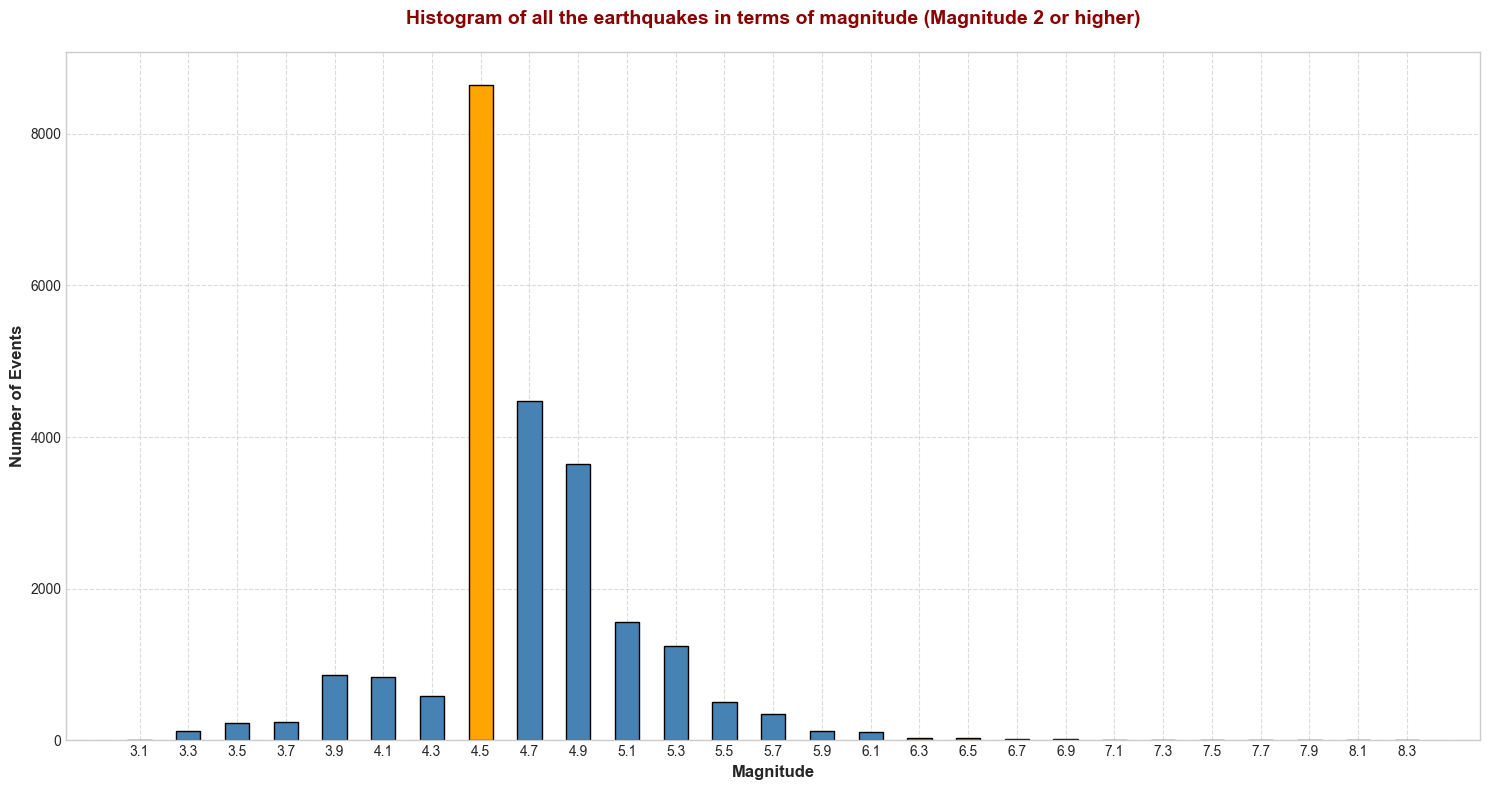

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configurar el estilo
plt.style.use('seaborn-v0_8-whitegrid')

# Crear la figura con un tamaño específico
plt.figure(figsize=(15, 8))

# Calcular el histograma
counts, bins, _ = plt.hist(df['MAGNITUD'], 
                          bins=np.arange(df['MAGNITUD'].min(), df['MAGNITUD'].max() + 0.2, 0.2),
                          alpha=0)  # Histograma invisible para calcular los valores

# Encontrar el índice del bin con más eventos
max_bin_index = np.argmax(counts)

# Centros de los bins para las barras
bin_centers = bins[:-1] + np.diff(bins)/2

# Crear las barras manualmente
for i, (count, center) in enumerate(zip(counts, bin_centers)):
    if i == max_bin_index:
        color = 'orange'  # Barra más alta en naranja
    else:
        color = 'steelblue'
    
    plt.bar(center, 
            count,
            width=0.1,  # Ancho delgado de las barras
            color=color,
            edgecolor='black',
            linewidth=1)

# Personalizar el gráfico
plt.title('Histogram of all the earthquakes in terms of magnitude (Magnitude 2 or higher)', 
          fontsize=14, 
          color='darkred',
          pad=20,
          fontweight='bold')
plt.xlabel('Magnitude', fontsize=12, fontweight='bold')
plt.ylabel('Number of Events', fontsize=12, fontweight='bold')

# Configurar las etiquetas del eje X con los valores de magnitud
plt.xticks(bin_centers, [f'{x:.1f}' for x in bin_centers], rotation=0)

# Ajustar los límites y la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df['MAGNITUD'].min() - 0.2, df['MAGNITUD'].max() + 0.2)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [89]:
from geopy.geocoders import Nominatim

def get_lat_lon_pais(pais):
    geolocator = Nominatim(user_agent="my_peru_sismos_app")
    loc = geolocator.geocode(pais)
    if loc:
        return loc.latitude, loc.longitude
    else:
        return None, None

pais = "Perú"
country_lat, country_lon = get_lat_lon_pais(pais)
print(f"Coordenadas de {pais}: Latitud {country_lat}, Longitud {country_lon}")

Coordenadas de Perú: Latitud -6.8699697, Longitud -75.0458515


In [98]:
start_year = 1960
end_year = 2000
filtered_df = df[(df['YEAR'] >= start_year) & (df['YEAR'] <= end_year)]
print(filtered_df.shape)
filtered_df.head()


(9079, 11)


,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE,YEAR,MONTH,DAY
0,0,1960-01-13,154034,-16.145,-72.144,60,7.5,20223006,1960,1,13
1,1,1960-01-15,93024,-15.000,-75.000,70,7.0,20223006,1960,1,15
2,2,1960-01-17,25758,-14.500,-74.500,150,6.4,20223006,1960,1,17
3,3,1960-01-23,33732,-12.500,-68.500,300,5.8,20223006,1960,1,23
4,4,1960-01-30,50724,-5.500,-77.500,100,5.7,20223006,1960,1,30


In [100]:
import folium
from folium import plugins
from IPython.display import display


if country_lat is not None and country_lon is not None:

    country_map = folium.Map(location=[country_lat, country_lon], zoom_start=5)
    heat_map_data = filtered_df[["LATITUD", "LONGITUD"]].values.tolist()
    country_map.add_child(plugins.HeatMap(heat_map_data, min_opacity=0.3, radius=13))

    display(country_map)

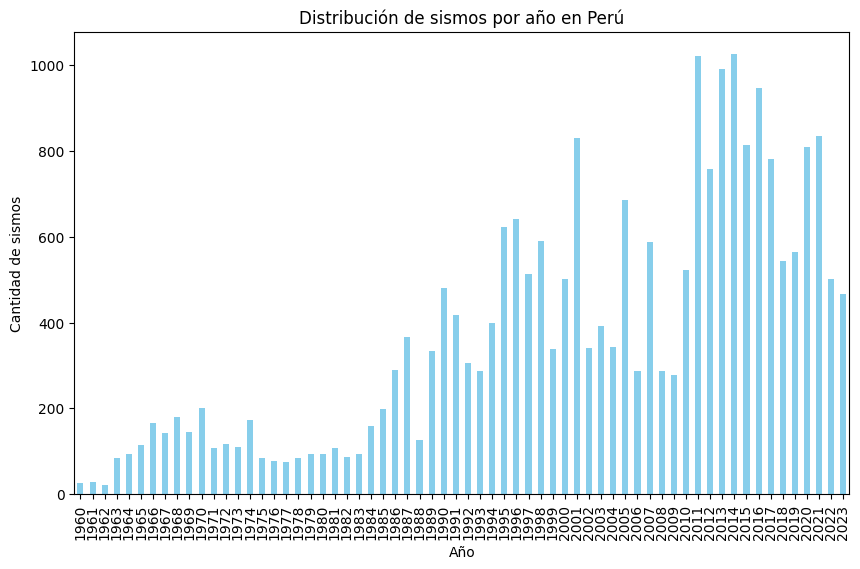

In [65]:
# Contar sismos por año
sismos_por_año = df.groupby('YEAR').size()

# Graficar
plt.figure(figsize=(10, 6))
sismos_por_año.plot(kind='bar', color='skyblue')
plt.title('Distribución de sismos por año en Perú')
plt.xlabel('Año')
plt.ylabel('Cantidad de sismos')
plt.show()

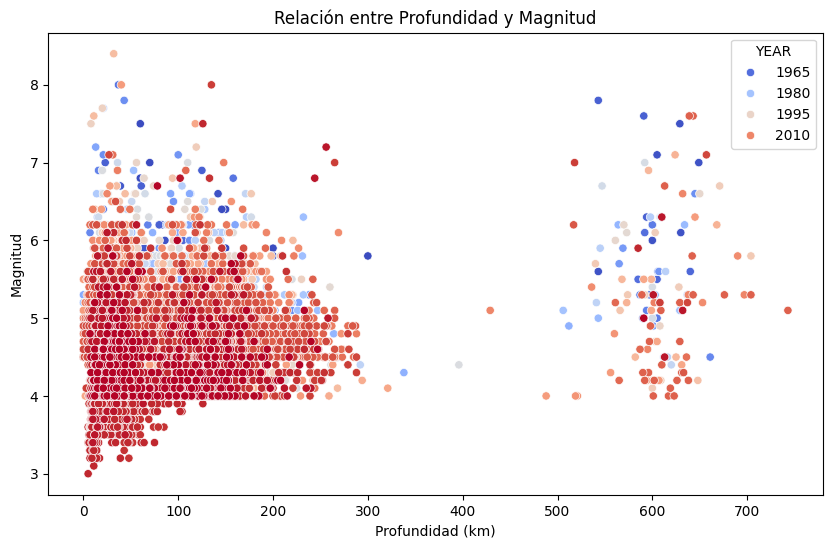

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PROFUNDIDAD', y='MAGNITUD', data=df, hue='YEAR', palette='coolwarm')
plt.title('Relación entre Profundidad y Magnitud')
plt.xlabel('Profundidad (km)')
plt.ylabel('Magnitud')
plt.show()

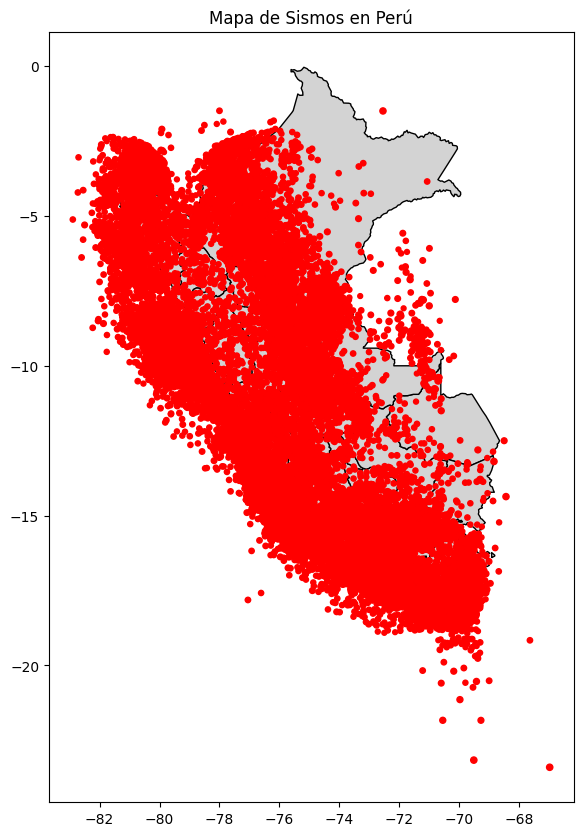

In [67]:
# Cargar el shapefile de Perú para el mapa
gdf_peru = gpd.read_file('../data/peru_departamental_simple.geojson')

# Crear GeoDataFrame de los sismos
gdf_sismos = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD))

# Graficar el mapa de sismos en Perú
fig, ax = plt.subplots(figsize=(10, 10))
gdf_peru.plot(ax=ax, color='lightgray', edgecolor='black')
gdf_sismos.plot(ax=ax, color='red', markersize=df['MAGNITUD'] * 3)
ax.set_title('Mapa de Sismos en Perú')
plt.show()

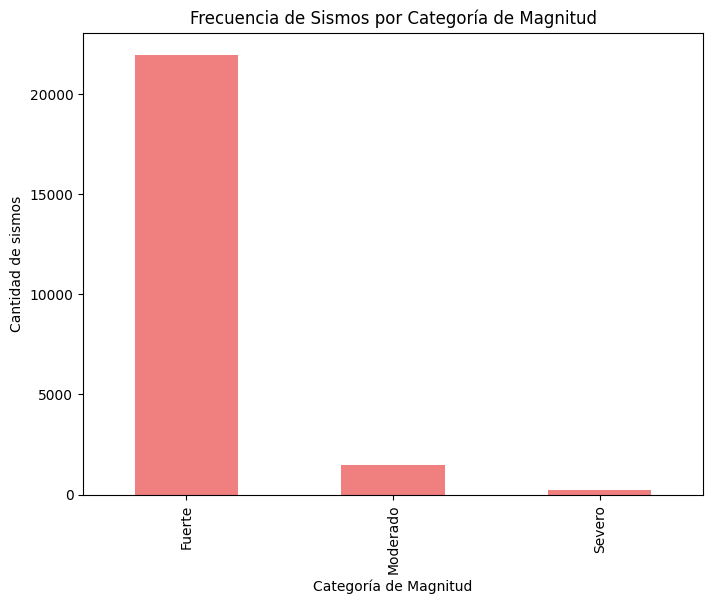

In [68]:
# Categorizar magnitudes
df['Magnitud_Categoria'] = pd.cut(df['MAGNITUD'], bins=[0, 4, 6, 8], labels=['Moderado', 'Fuerte', 'Severo'])

# Contar sismos por categoría de magnitud
frecuencia_magnitud = df['Magnitud_Categoria'].value_counts()

# Graficar
plt.figure(figsize=(8, 6))
frecuencia_magnitud.plot(kind='bar', color='lightcoral')
plt.title('Frecuencia de Sismos por Categoría de Magnitud')
plt.xlabel('Categoría de Magnitud')
plt.ylabel('Cantidad de sismos')
plt.show()

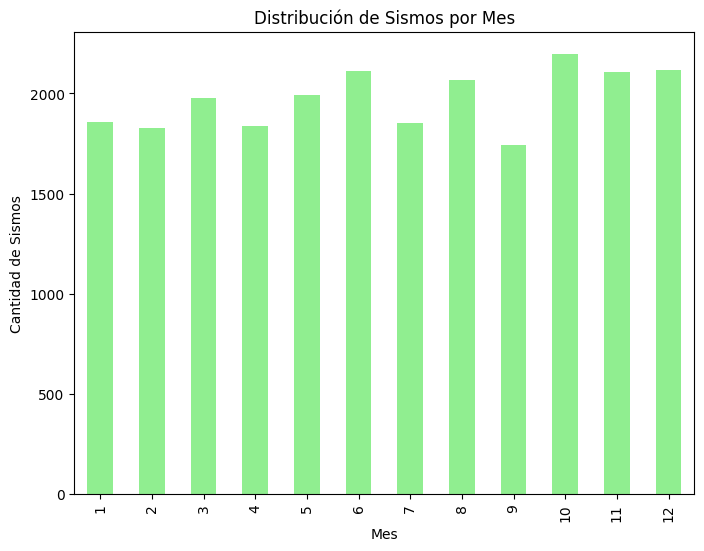

In [70]:
# Agrupar sismos por mes
sismos_por_mes = df.groupby('MONTH').size()

# Graficar
plt.figure(figsize=(8, 6))
sismos_por_mes.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Sismos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Sismos')
plt.show()

In [34]:
df.shape

(23680, 9)

In [36]:
df.dtypes

ID                      int64
FECHA_UTC      datetime64[ns]
HORA_UTC                int64
LATITUD               float64
LONGITUD              float64
PROFUNDIDAD             int64
MAGNITUD              float64
FECHA_CORTE             int64
YEAR                    int32
dtype: object

In [51]:
df.head()

,ID,FECHA_UTC,HORA_UTC,LATITUD,LONGITUD,PROFUNDIDAD,MAGNITUD,FECHA_CORTE,YEAR
0,0,1960-01-13,154034,-16.145,-72.144,60,7.5,20223006,1960
1,1,1960-01-15,93024,-15.000,-75.000,70,7.0,20223006,1960
2,2,1960-01-17,25758,-14.500,-74.500,150,6.4,20223006,1960
3,3,1960-01-23,33732,-12.500,-68.500,300,5.8,20223006,1960
4,4,1960-01-30,50724,-5.500,-77.500,100,5.7,20223006,1960


In [57]:
start_year = 1960
end_year = 2023
filtered_df = df[(df['YEAR'] >= start_year) & (df['YEAR'] <= end_year)]

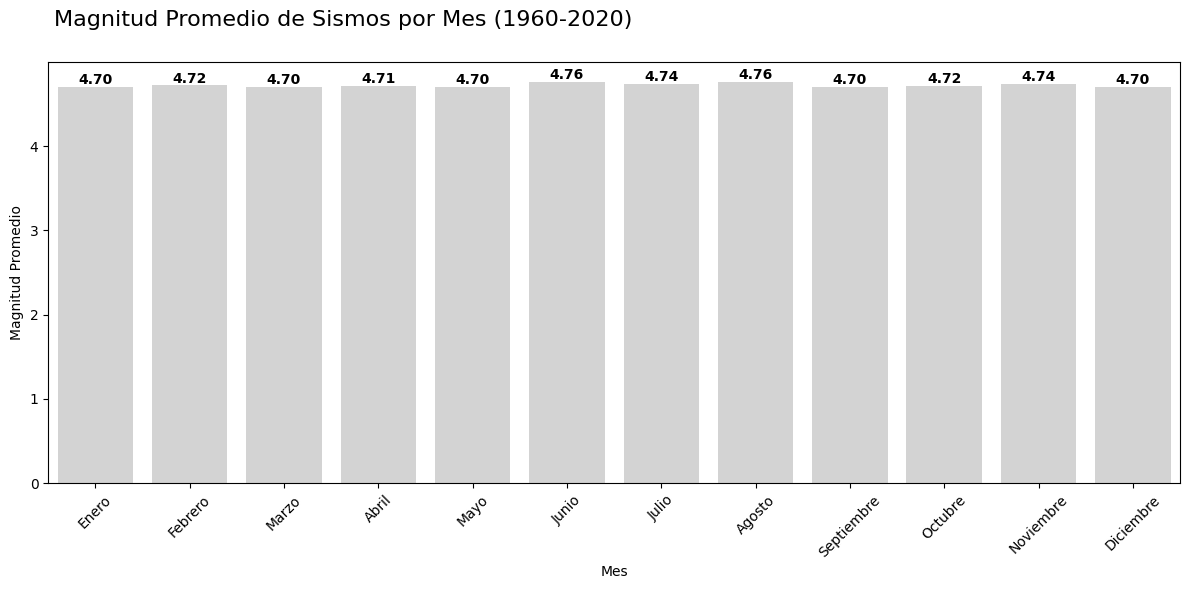

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_monthly_magnitudedf(df, start_year, end_year):
    df = df.copy()
    
    plt.figure(figsize=(12, 6))
    filtered_df = df[(df['YEAR'] >= start_year) & (df['YEAR'] <= end_year)]
    magnitud_por_mes = filtered_df.groupby(filtered_df['FECHA_UTC'].dt.month)['MAGNITUD'].mean().reset_index()

    nombres_meses = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
        5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
        9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }
    
    magnitud_por_mes['Mes'] = magnitud_por_mes['FECHA_UTC'].map(nombres_meses)   
    colors = ['lightgrey'] * 12
    
    ax = sns.barplot(data=magnitud_por_mes, 
                    x='Mes', 
                    y='MAGNITUD',
                    palette=colors)
    
    plt.title('Magnitud Promedio de Sismos por Mes (1960-2020)', 
             pad=20, 
             fontsize=16, 
             ha='left',
             x=0.005,
             y=1.02)
    
    plt.xlabel('Mes')
    plt.ylabel('Magnitud Promedio')
    plt.xticks(rotation=45)
    
    for i, v in enumerate(magnitud_por_mes['MAGNITUD']):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom',
                fontweight='bold')
    
    plt.tight_layout()
    plt.show()


plot_monthly_magnitudedf(df, start_year, end_year)

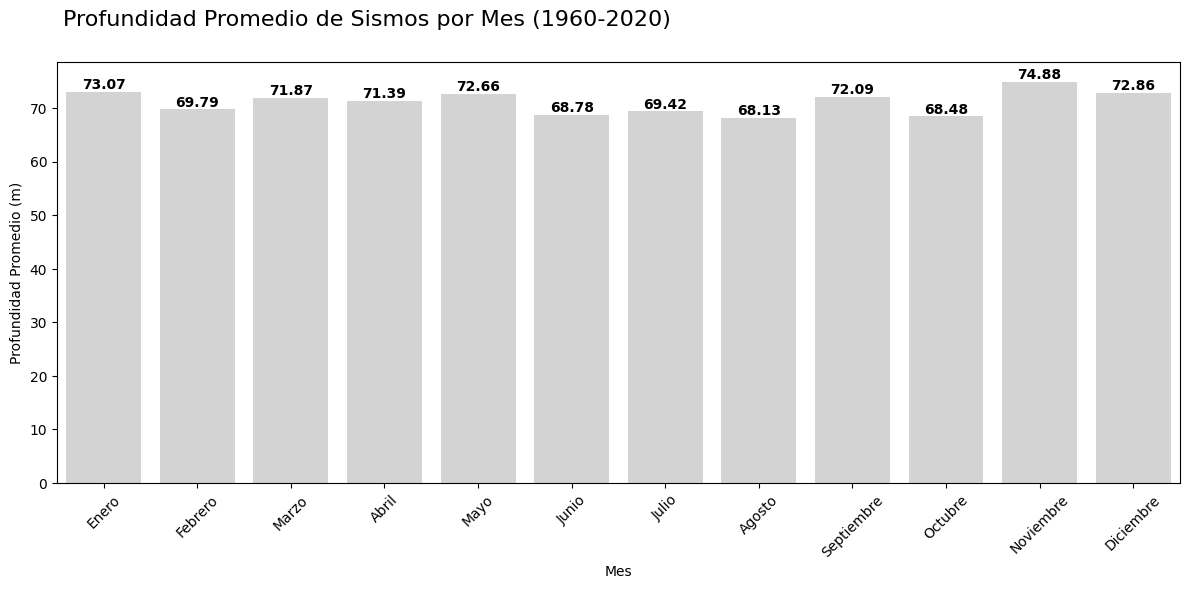

In [59]:
def plot_monthly_depth(df, start_year, end_year):
    df = df.copy()
    
    plt.figure(figsize=(12, 6))
    
    filtered_df = df[(df['YEAR'] >= start_year) & (df['YEAR'] <= end_year)]
    profundidad_por_mes = filtered_df.groupby(filtered_df['FECHA_UTC'].dt.month)['PROFUNDIDAD'].mean().reset_index()
    
    nombres_meses = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
        5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
        9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }
    
    profundidad_por_mes['Mes'] = profundidad_por_mes['FECHA_UTC'].map(nombres_meses)
    colors = ['lightgrey'] * 12
    
    ax = sns.barplot(data=profundidad_por_mes, 
                    x='Mes', 
                    y='PROFUNDIDAD',
                    palette=colors)
    
    plt.title('Profundidad Promedio de Sismos por Mes (1960-2020)', 
             pad=20, 
             fontsize=16, 
             ha='left',
             x=0.005,
             y=1.02)
    
    plt.xlabel('Mes')
    plt.ylabel('Profundidad Promedio (m)')
    plt.xticks(rotation=45)
    
    for i, v in enumerate(profundidad_por_mes['PROFUNDIDAD']):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom',
                fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
plot_monthly_depth(df, start_year, end_year)

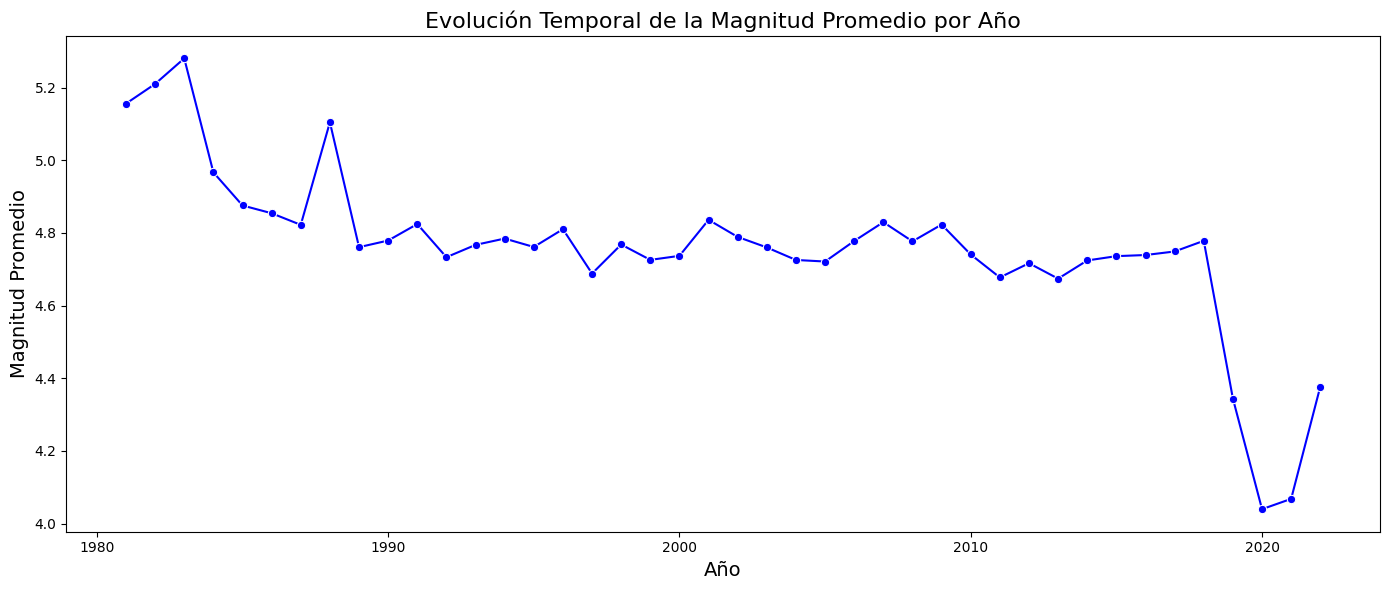

In [7]:
df['FECHA_UTC_ALTERNATIVE'] = pd.to_datetime(df['FECHA_UTC'], format='%Y%m%d')
df['año'] = df['FECHA_UTC_ALTERNATIVE'].dt.year

# Corrección de la comparación para que sea entre números
df = df[(df['año'] > 1980) & (df['año'] < 2023)]

# Agrupamos por 'año' y calculamos la media de 'MAGNITUD'
promedios_por_año = df.groupby('año')['MAGNITUD'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='año', y='MAGNITUD', data=promedios_por_año, marker='o', color='b')
plt.title("Evolución Temporal de la Magnitud Promedio por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Magnitud Promedio", fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
df = df[df['FECHA_UTC_ALTERNATIVE']<=''

'2023-12-31T00:00:00'

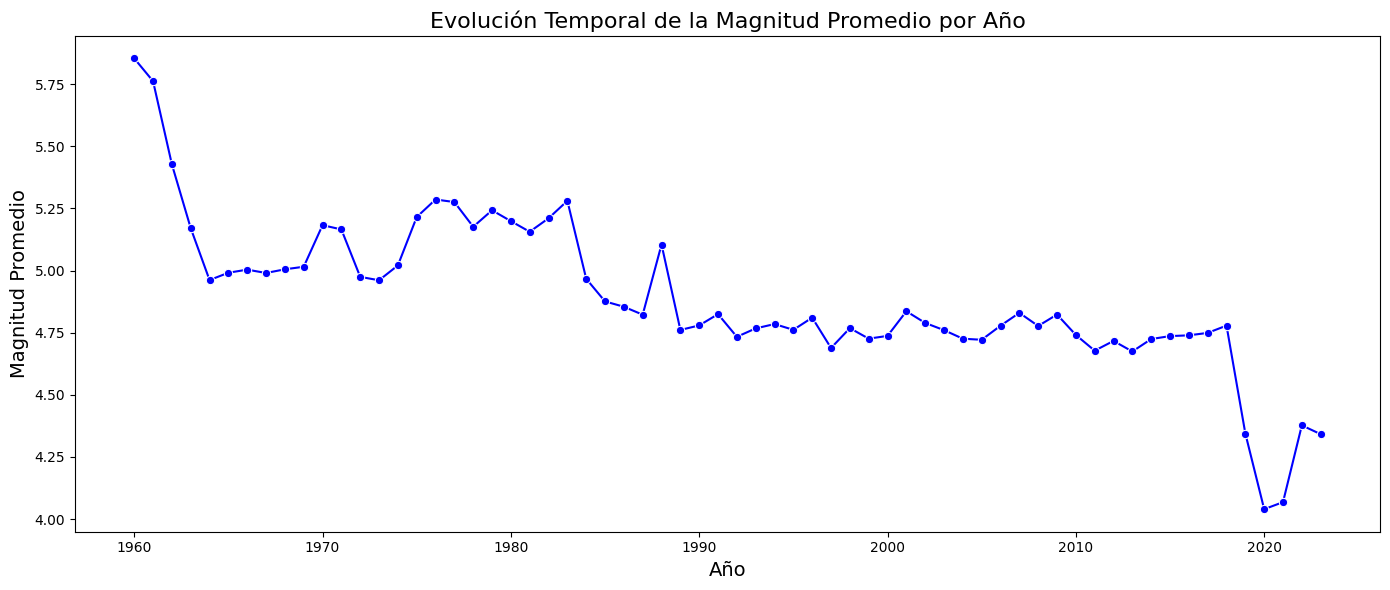

In [15]:

df['año'] = df['FECHA_UTC'].dt.year
promedios_por_año = df.groupby('año')['MAGNITUD'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='año', y='MAGNITUD', data=promedios_por_año, marker='o', color='b')
plt.title("Evolución Temporal de la Magnitud Promedio por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Magnitud Promedio", fontsize=14)
plt.tight_layout()
plt.show()


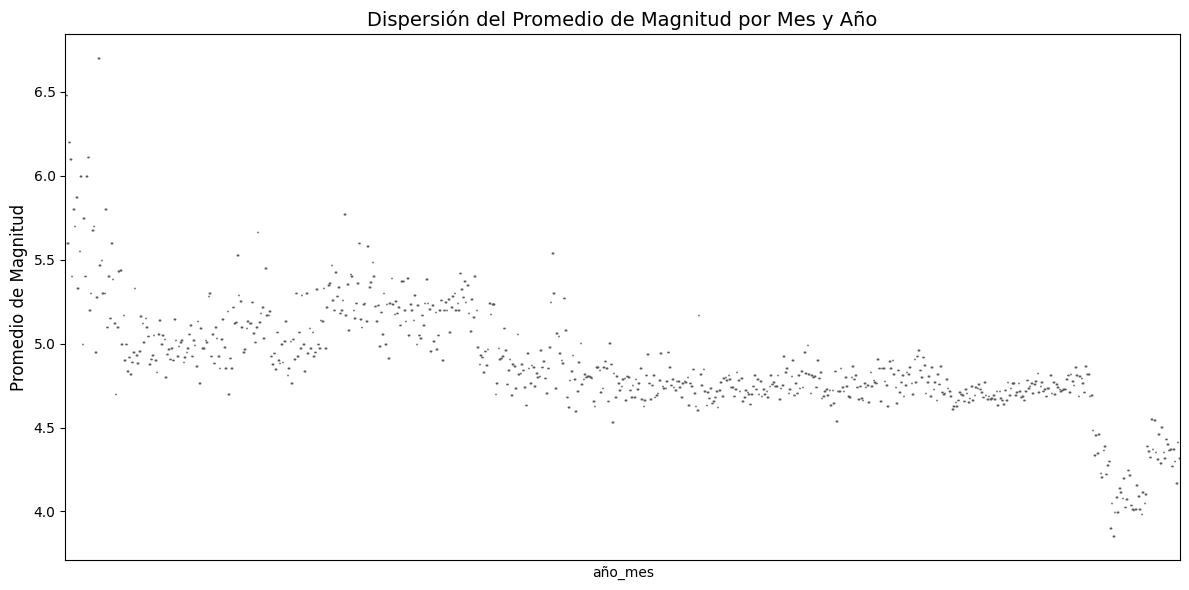

In [7]:

df['año'] = df['FECHA_UTC'].dt.year  # Año
df['mes'] = df['FECHA_UTC'].dt.month  # Mes
promedios_mensuales = df.groupby(['año', 'mes'])['MAGNITUD'].mean().reset_index()
promedios_mensuales['año_mes'] = promedios_mensuales['año'].astype(str) + '-' + promedios_mensuales['mes'].astype(str).str.zfill(2)
plt.figure(figsize=(12, 6))
sns.boxplot(x='año_mes', y='MAGNITUD', data=promedios_mensuales, palette='Set2')
plt.title("Dispersión del Promedio de Magnitud por Mes y Año", fontsize=14)
plt.ylabel("Promedio de Magnitud", fontsize=12)
plt.xticks([])
plt.tight_layout()
plt.show()


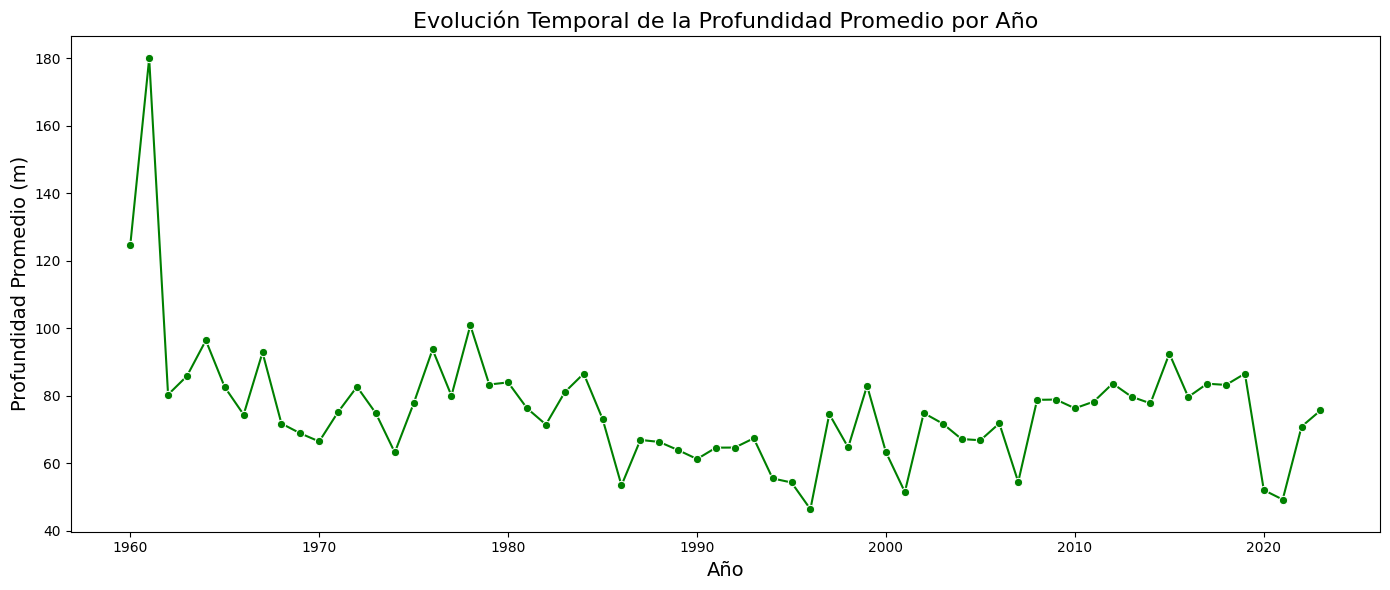

In [11]:
df['año'] = df['FECHA_UTC'].dt.year
promedios_por_año_profundidad = df.groupby('año')['PROFUNDIDAD'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='año', y='PROFUNDIDAD', data=promedios_por_año_profundidad, marker='o', color='g')
plt.title("Evolución Temporal de la Profundidad Promedio por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Profundidad Promedio (m)", fontsize=14)
plt.tight_layout()
plt.show()


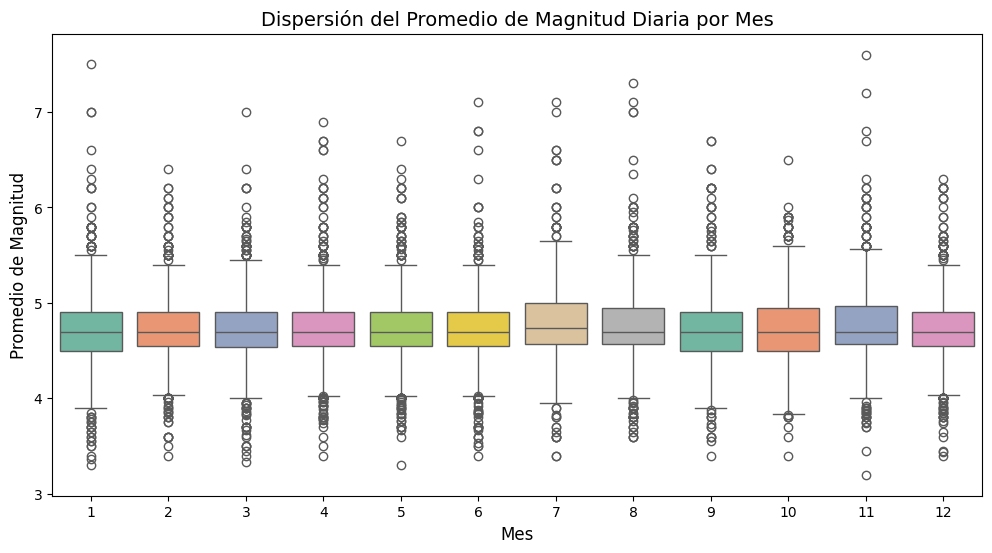

In [10]:
df['mes'] = df['FECHA_UTC'].dt.month  # Mes
df['dia'] = df['FECHA_UTC'].dt.date  # Día
promedios_diarios = df.groupby(['mes', 'dia'])['MAGNITUD'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='MAGNITUD', data=promedios_diarios, palette='Set2')
plt.title("Dispersión del Promedio de Magnitud Diaria por Mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Promedio de Magnitud", fontsize=12)
plt.show()

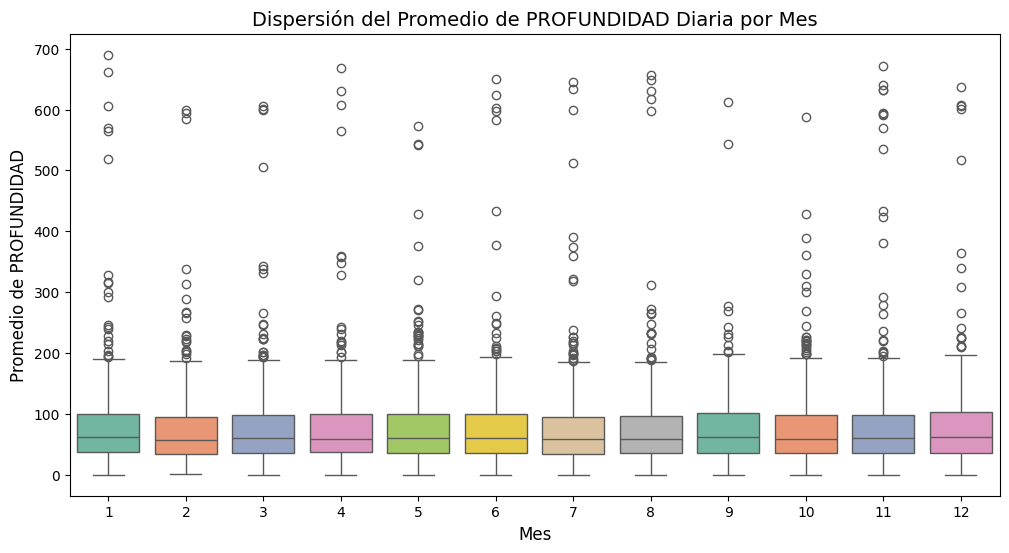

In [ ]:
df['mes'] = df['FECHA_UTC'].dt.month
df['dia'] = df['FECHA_UTC'].dt.date
promedios_diarios = df.groupby(['mes', 'dia'])['PROFUNDIDAD'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='PROFUNDIDAD', data=promedios_diarios, palette='Set2')
plt.title("Dispersión del Promedio de PROFUNDIDAD Diaria por Mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Promedio de PROFUNDIDAD", fontsize=12)
plt.show()

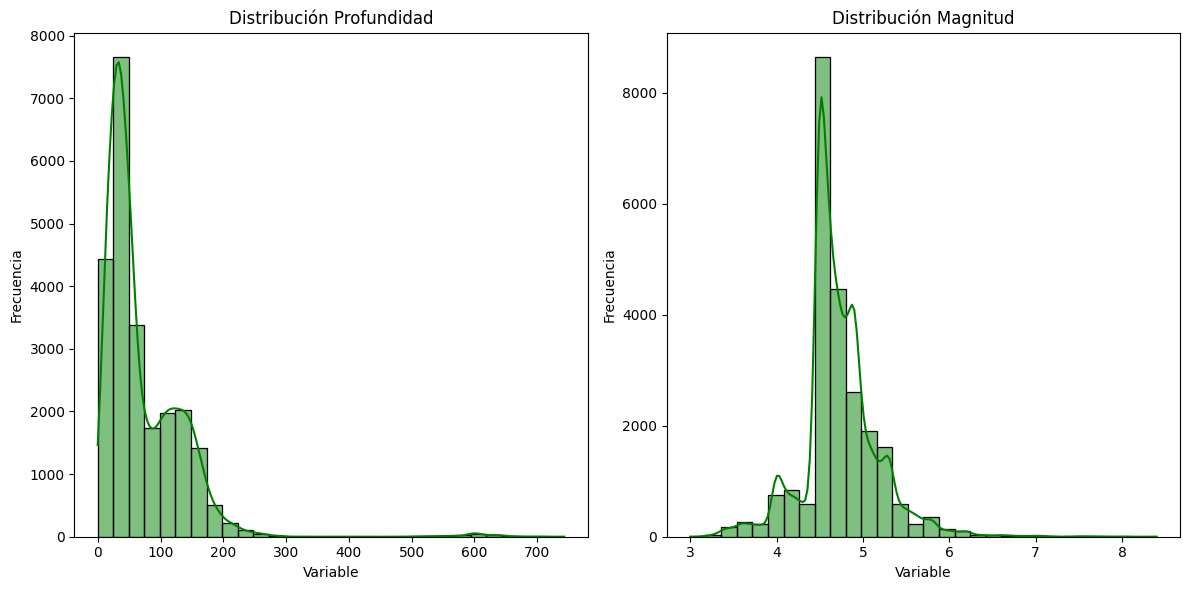

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['PROFUNDIDAD'], bins=30, kde=True, color='g')
plt.title('Distribución Profundidad')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df['MAGNITUD'], bins=30, kde=True, color='g')
plt.title('Distribución Magnitud')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


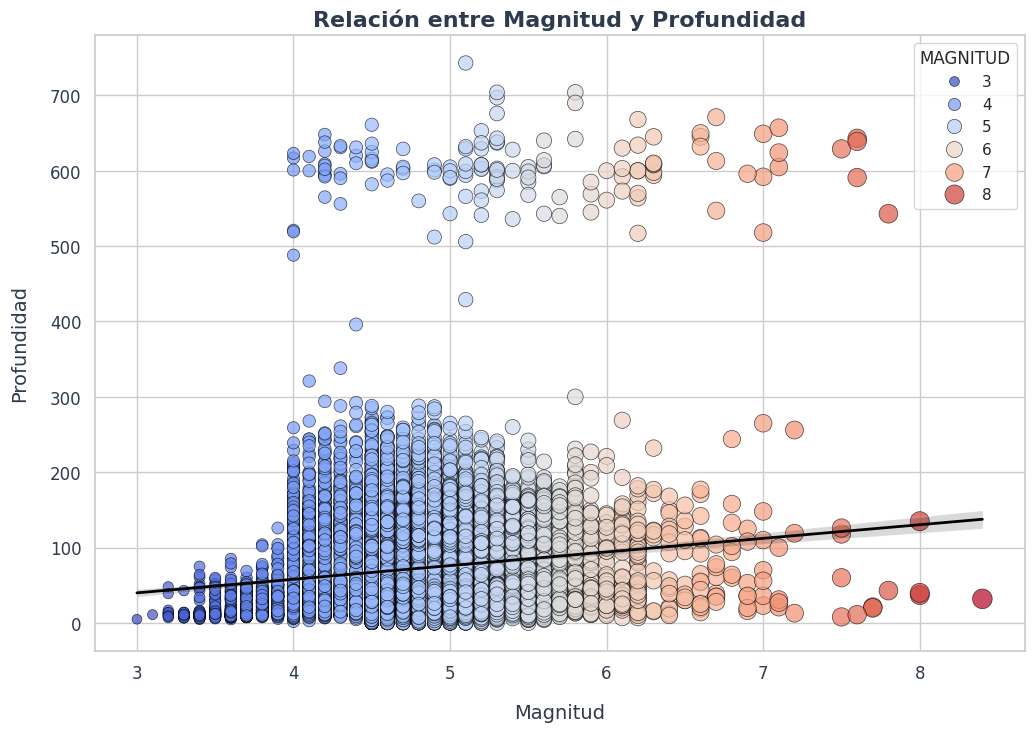

In [ ]:
df['FECHA_UTC'] = pd.to_datetime(df['FECHA_UTC'], format='%Y%m%d')
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='MAGNITUD', y='PROFUNDIDAD', hue='MAGNITUD', palette='coolwarm',
                size='MAGNITUD', sizes=(50, 200), alpha=0.7, edgecolor='black', linewidth=0.5)
sns.regplot(data=df, x='MAGNITUD', y='PROFUNDIDAD', scatter=False, color='gray', line_kws={"color": "black", "lw": 2})
plt.title('Relación entre Magnitud y Profundidad', fontsize=16, color='#2E3B4E', weight='bold')
plt.xlabel('Magnitud', fontsize=14, color='#2E3B4E', labelpad=15)
plt.ylabel('Profundidad', fontsize=14, color='#2E3B4E', labelpad=15)

plt.tick_params(axis='both', which='major', labelsize=12, labelcolor='#2E3B4E')

# Leyenda sin

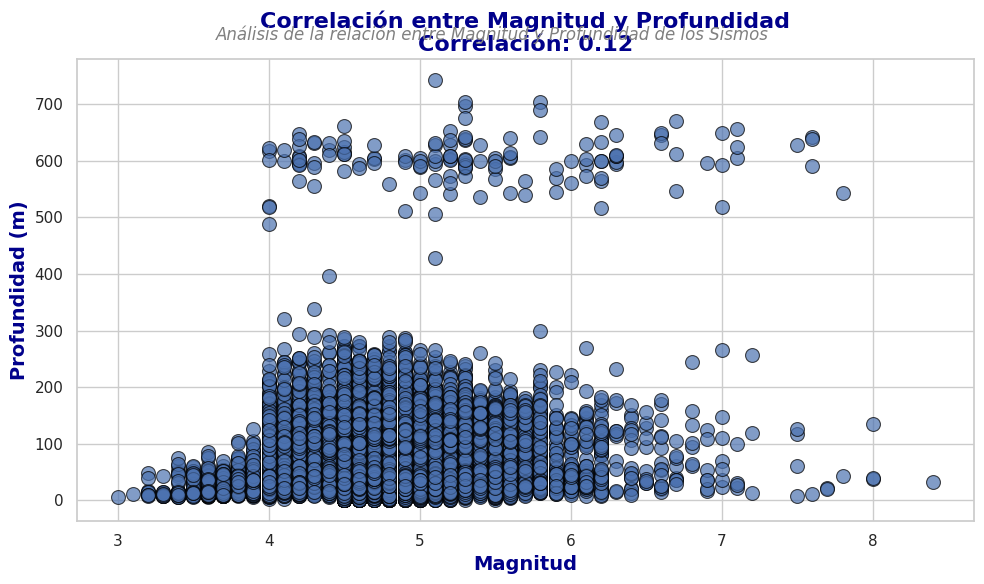

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df[['MAGNITUD', 'PROFUNDIDAD']].corr().iloc[0, 1]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='MAGNITUD', y='PROFUNDIDAD', data=df, color='#4C72B0', s=100, edgecolor='black', alpha=0.7)

scatter_plot.set_title(f"Correlación entre Magnitud y Profundidad\nCorrelación: {correlacion:.2f}",
                       fontsize=16, fontweight='bold', color='darkblue')
scatter_plot.set_xlabel("Magnitud", fontsize=14, fontweight='bold', color='darkblue')
scatter_plot.set_ylabel("Profundidad (m)", fontsize=14, fontweight='bold', color='darkblue')
plt.figtext(0.5, 0.92, "Análisis de la relación entre Magnitud y Profundidad de los Sismos",
            ha='center', fontsize=12, color='gray', style='italic')
plt.tight_layout()
plt.show()


In [15]:
df_alto = df[(df['MAGNITUD'] >= 4) & (df['PROFUNDIDAD'] > 0)]

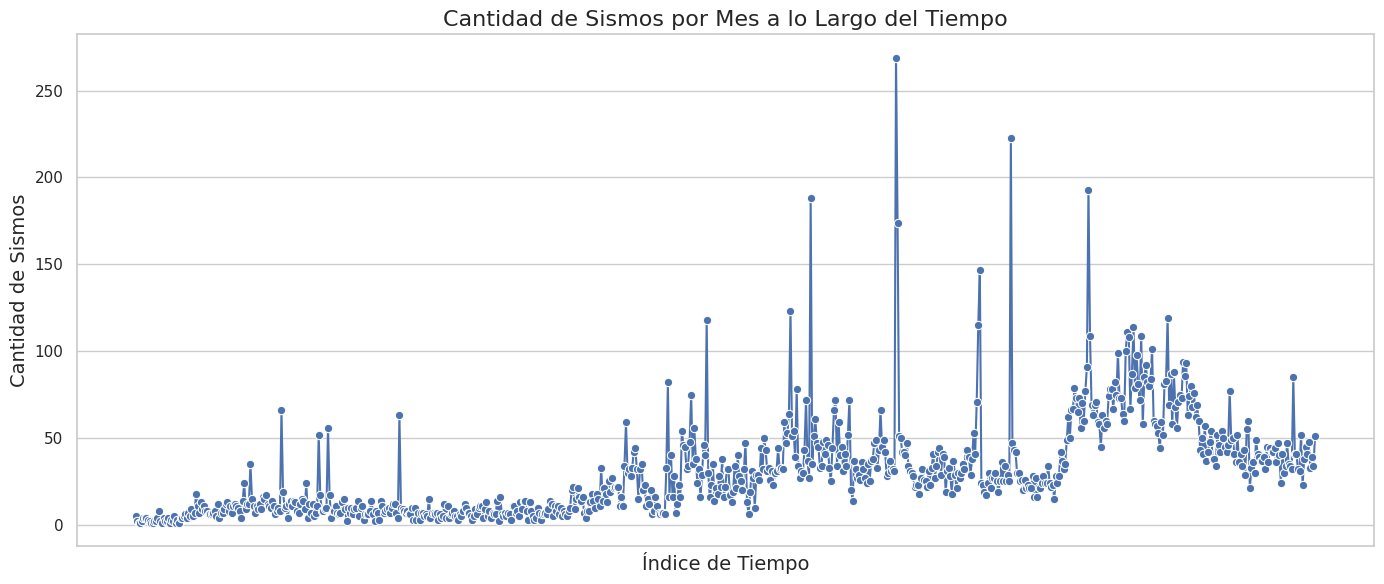

In [16]:

df_alto['año'] = df_alto['FECHA_UTC'].dt.year
df_alto['mes'] = df_alto['FECHA_UTC'].dt.month
cantidad_sismos = df_alto.groupby(['año', 'mes']).size().reset_index(name='cantidad_sismos')
cantidad_sismos['año_mes'] = cantidad_sismos['año'].astype(str) + '-' + cantidad_sismos['mes'].astype(str).str.zfill(2)
plt.figure(figsize=(14, 6))
sns.lineplot(x=cantidad_sismos.index, y='cantidad_sismos', data=cantidad_sismos, marker='o', color='b')
plt.title("Cantidad de Sismos por Mes a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Índice de Tiempo", fontsize=14)  # Cambiar etiqueta del eje X
plt.ylabel("Cantidad de Sismos", fontsize=14)
plt.xticks([])
plt.tight_layout()
plt.show()


In [ ]:
pip install matplotlib basemap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
import folium
from folium import plugins
import branca

colormap = branca.colormap.linear.YlGnBu_09.scale(df_alto['MAGNITUD'].min(), df_alto['MAGNITUD'].max())
at_mean = df_alto['LATITUD'].mean()
lon_mean = df_alto['LONGITUD'].mean()
map_ = folium.Map(location=[lat_mean, lon_mean], zoom_start=12)
for idx, row in df_alto.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=row['MAGNITUD']*1,
        color=colormap(row['MAGNITUD']),
        fill=True,
        fill_color=colormap(row['MAGNITUD']),
        fill_opacity=0.9,
        popup=f"Profundidad: {row['PROFUNDIDAD']}\nMagnitud: {row['MAGNITUD']}",
    ).add_to(map_)

colormap.add_to(map_)
map_




In [ ]:
df_promedio_mes.head()

,Mes_Año,profundidad_promedio,magnitud_promedio
0,1960-01,136.0,6.48
1,1960-02,143.0,5.60
2,1960-03,80.0,6.20
3,1960-04,100.0,6.10
4,1960-05,80.0,5.40


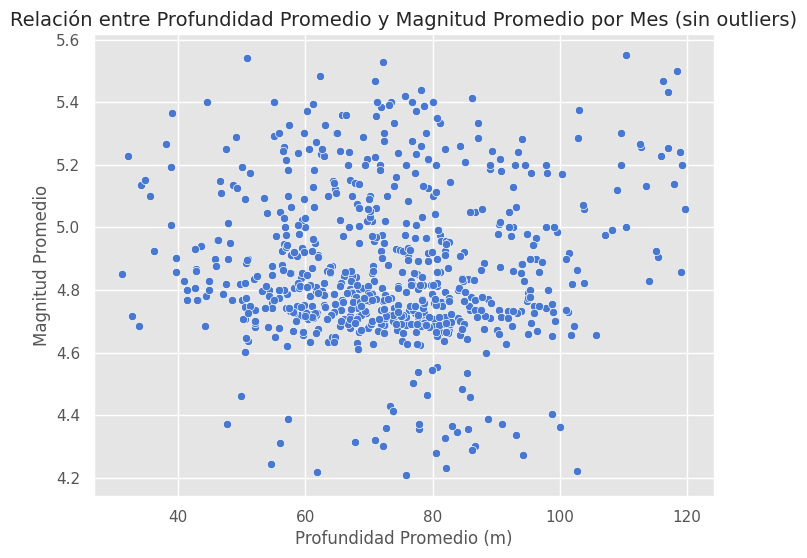

In [ ]:
Q1_profundidad = df_promedio_mes['profundidad_promedio'].quantile(0.25)
Q3_profundidad = df_promedio_mes['profundidad_promedio'].quantile(0.75)
IQR_profundidad = Q3_profundidad - Q1_profundidad
limite_inferior_profundidad = Q1_profundidad - 1.5 * IQR_profundidad
limite_superior_profundidad = Q3_profundidad + 1.5 * IQR_profundidad
Q1_magnitud = df_promedio_mes['magnitud_promedio'].quantile(0.25)
Q3_magnitud = df_promedio_mes['magnitud_promedio'].quantile(0.75)
IQR_magnitud = Q3_magnitud - Q1_magnitud
limite_inferior_magnitud = Q1_magnitud - 1.5 * IQR_magnitud
limite_superior_magnitud = Q3_magnitud + 1.5 * IQR_magnitud
df_filtrado = df_promedio_mes[
    (df_promedio_mes['profundidad_promedio'] >= limite_inferior_profundidad) &
    (df_promedio_mes['profundidad_promedio'] <= limite_superior_profundidad) &
    (df_promedio_mes['magnitud_promedio'] >= limite_inferior_magnitud) &
    (df_promedio_mes['magnitud_promedio'] <= limite_superior_magnitud)
]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='profundidad_promedio', y='magnitud_promedio', data=df_filtrado, color='b')
plt.title('Relación entre Profundidad Promedio y Magnitud Promedio por Mes (sin outliers)', fontsize=14)
plt.xlabel('Profundidad Promedio (m)', fontsize=12)
plt.ylabel('Magnitud Promedio', fontsize=12)
plt.grid(True)
plt.show()
